# Introduction
There is an imbalance in the education system during the Covid19 pandemic and most of the students don't even have access to educational tools and online learning platforms. There is an urgent need to come up with solutions and by using LearnPlatform dataset I will figure some of the common patterns and identify the clusters based on demography, geography, and accessibility.

## Project Goals
In this project, I will be using data analysis tools to figure out trends in digital learning and how it is effective towards improvised communities. I will be comparing districts and states on factors like demography, internet access, learning product access, and finance. In the end, I will summarize our report and point towards the areas that need our more attention to make education accessible for all students the United States.

Datasets: https://www.kaggle.com/competitions/learnplatform-covid19-impact-on-digital-learning/data

# Table of Contents

1. [Introduction](#introduction)
2. [Custom Theme Setup](#custom-theme-setup)
3. [Data Preprocessing and Exploration](#data-preprocessing-and-exploration)
   - [Feature Distributions Visualization](#feature-distributions-visualization)
     - [Districts per State](#districts-per-state)
     - [Locale Distribution](#locale-distribution)
     - [Educational Product Providers](#educational-product-providers)
     - [Educational Sector Distributions](#educational-sector-distributions)
     - [Primary Functions with Main and Subcategories](#primary-functions-with-main-and-subcategories)
     - [Essential Function Subcategories Distribution](#essential-function-subcategories-distribution)
     - [Top Educational Products](#top-educational-products)
4. [Distribution of Race, Reduced Fee, Expenditures, and Internet Connection per State](#distribution-of-race-reduced-fee-expenditures-and-internet-connection-per-state)
   - [Black and Hispanic](#black-and-hispanic)
   - [Reduced Fee or Free Education](#reduced-fee-or-free-education)
   - [Per-Pupil Total Expenditure](#per-pupil-total-expenditure)
5. [Time Series Distribution of Educational Product Access for Students](#time-series-distribution-of-educational-product-access-for-students)
   - [Based on Locale](#based-on-locale)
   - [Based on Top Five States](#based-on-top-five-states)
   - [Based on Top Least States](#based-on-top-least-states)
6. [Geographical Analysis](#geographical-analysis)
   - [Education Products Access per State](#education-products-access-per-state)
   - [Engagement Index Per State](#engagement-index-per-state)
7. [Focusing on People from Impoverished Neighborhoods](#focusing-on-people-from-impoverished-neighborhoods)
   - [Correlation](#correlation)
   - [Black/Hispanic Products Access Over the Year](#blackhispanic-products-access-over-the-year)


# Import relevant libraries
I will be mostly using Altair, Seaborn, and Plotly for data visualization. For data analysis, I will be using Numpy and Pandas.

In [3]:
import numpy as np
import pandas as pd
import math

import glob
import os

import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

# Creating custome altair theme
We can create your own theme in Altair which provides uniformity to your plots.

In [48]:
def LearnPlatorm_theme(*args, **kwargs):
    return {
            "width": 700,
            "height": 300,
            "config": {
              "style": {
                "bar": {
                  "size": 15
                },
                "guide-title": {
                  "fontSize": 15
                },
                "guide-label": {
                  "fontSize": 15
                },
              },
              "scale": {
                "bandPaddingInner": 0.5,
                "bandPaddingOuter": 0.5
              },
              "legend": {
                "symbolSize": 15,
                "titleFontSize": 15,
                "labelFontSize": 9
              },
              "axis": {
                "titleFontSize": 15,
                "labelFontSize": 18
              },
              "title": {"fontSize": 20},
            }
          }


alt.themes.register('LearnPlatorm_theme', LearnPlatorm_theme)
alt.themes.enable('LearnPlatorm_theme');

# Data
We have three types of Dataset.
1. Products data contains Sevice names, Companies, and educational sectors.
2. District data contains Demography, Locations, and Educational Spendings.
3. Engagement data contains student's engagement with different products per day.

## Product
The product file `products_info.csv` includes information about the characteristics of the top 372 products with most users in 2020. The categories listed in this file are part of LearnPlatform's product taxonomy.

| **Name**                       | **Description**                                                                                                                                                                                                                                                                                                                    |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| LP ID                      | The unique identifier of the product                                                                                                                                                                                                                                                                                           |
| URL                        | Web Link to the specific product                                                                                                                                                                                                                                                                                               |
| Product Name               | Name of the specific product                                                                                                                                                                                                                                                                                                   |
| Provider/Company Name      | Name of the product provider                                                                                                                                                                                                                                                                                                   |
| Sector(s)                  | Sector of education where the product is used                                                                                                                                                                                                                                                                                  |
| Primary Essential Function | The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled |
|                            |   

### Loading Data Educational Product Data
As we can see we have product names, Companies, and Sector data with Primary Functions.

In [6]:
products_data = pd.read_csv("products_info.csv")
products_data.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


## District
The district file ```districts_info.csv``` includes information about the **characteristics of school districts**, including data from
- NCES (2018-19),
- FCC (Dec 2018), and
- Edunomics Lab.

| Name                   | Description                                                                                                                                                                                                                                                                              |
|------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| district_id            | The unique identifier of the school district                                                                                                                                                                                                                                             |
| state                  | The state where the district resides in                                                                                                                                                                                                                                                  |
| locale                 | NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information.                                                                                                          |
| pct_black/hispanic     | Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data                                                                                                                                                                                       |
| pct_free/reduced       | Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data                                                                                                                                                                              |
| countyconnectionsratio | ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.                                                                         |
| pptotalraw             | Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district. |

### Loading Data District Data
We have different states, locale, educational spending and more importanly we have Demographical data.  

In [7]:
districts_data = pd.read_csv("districts_info.csv")
districts_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


### Engagement data
The engagement data are aggregated at school district level, and each file in the folder `engagement_data` represents data from **one school district**.


| Name             | Description                                                                                                    |
|------------------|----------------------------------------------------------------------------------------------------------------|
| time             | date in "YYYY-MM-DD"                                                                                           |
| lp_id            | The unique identifier of the product                                                                           |
| pct_access       | Percentage of students in the district have at least one page-load event of a given product and on a given day |
| engagement_index | Total page-load events per one thousand students of a given product and on a given day                         |

#### Engagement Data Extraction Function
Our engagement data is divided into multiple `.csv` files based on _District id_ so we need to create a Python function to extract data from the individual files and concat them into one.

![image.png](attachment:547bb482-cbbc-4902-9785-81b9537d00c2.png)

In [8]:
def engagement_data_extract(file_path):

    dir_path = os.path.dirname(file_path)
    ap = []
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith('.csv'):
        #             print (root+'/'+str(file))

                df = pd.read_csv(root+'/'+str(file), index_col=None, header=0)
                district_id = file.split(".")[0]
                df["district_id"] = district_id
                ap.append(df)
        engagement = pd.concat(ap)
        engagement = engagement.reset_index(drop=True)
    return engagement

### Loading Data Engagement Data
It took us 9 seconds to load all files from a folder and now we have DataFrame containing all distract Engagement Data.

In [9]:
%%time
engagement_data = engagement_data_extract("engagement_data/")
engagement_data.head()

CPU times: user 7.04 s, sys: 2 s, total: 9.03 s
Wall time: 10 s


,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,29322.0,0.04,1.30,3188
1,2020-01-01,57084.0,0.04,0.43,3188
2,2020-01-01,99916.0,0.09,5.20,3188
3,2020-01-01,58235.0,0.00,NaN,3188
4,2020-01-01,11585.0,0.04,1.30,3188


# Missing Data
Let's look at all three DataFrames for missing values per Column

## Plot Missing function
The function helps us plot an Altair bar chart for all data frames containing missing values.

In [10]:
def plot_missing(df):
    data = df.isnull().sum().to_frame().reset_index()\
            .rename(columns={'index':'Columns',0:'Counts'})
    return alt.Chart(data).mark_bar().encode(
    x='Columns',
    y='Counts',
    tooltip='Counts'
    )

As we can observe that our district dataset mostly contains missing values in `pp_total_raw,pct_free/reduced,county_connections_ratio`. Let's see all the missing values together in the next section.

In [11]:
NA = pd.DataFrame(data=[districts_data.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
            for i in (districts_data.isna().sum()/districts_data.shape[0]*100).tolist()]],
            columns=districts_data.columns, index=['NA Count', 'NA Percent']).transpose().\
            sort_values(by='NA Count',ascending=False)
NA.style.background_gradient(cmap="vlag", subset=['NA Count'])

,NA Count,NA Percent
pp_total_raw,115,49.36%
pct_free/reduced,85,36.48%
county_connections_ratio,71,30.47%
state,57,24.46%
locale,57,24.46%
pct_black/hispanic,57,24.46%
district_id,0,0.00%


The subplot below shows missing values in all three datasets we will be removing them in the next section as it is hard to replace them without actual information.

In [12]:
plot_eng = plot_missing(engagement_data).\
        properties(title='Engagement', width=200, height=200)

plot_pro = plot_missing(products_data).\
        properties(title='Products', width=200, height=200)

plot_dis = plot_missing(districts_data).\
        properties(title='Districts', width=200, height=200)

alt.hconcat(plot_pro, plot_dis, plot_eng )

alt.HConcatChart(...)

# Cleaning Data
I will be cleaning district data as it contains an array of values. We will be taking advantage of both limits.
1. Converting list of columns`pct_black/hispanic` and `pct_free/reduced` into float
2. Converting list `pp_total_raw` into Integers.
3. Droping `county_connections_ratio` due to static 0.18 to 1 values acrross all categories.

In [13]:
districts_data.dropna(inplace = True)
for i in ['pct_black/hispanic', 'pct_free/reduced','county_connections_ratio']:
    districts_data[i] = districts_data[i].apply(lambda x: float(str(x).split(',')[0][1:])+0.1)

districts_data['pp_total_raw'] = districts_data['pp_total_raw'].apply(lambda x: int(x.split(',')[0][1:]) + 1000)
districts_data.drop('county_connections_ratio', axis = 1, inplace = True)

districts_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,15000
2,4921,Utah,Suburb,0.1,0.3,7000
5,5987,Wisconsin,Suburb,0.1,0.1,11000
6,3710,Utah,Suburb,0.1,0.5,7000
7,7177,North Carolina,Suburb,0.3,0.3,9000


# Feature Distributions Visualization
In this section, we will discover different features distributions.

## Districts per states
As we can see the dataset contains more districts from Utah and Illinois than any other state.

In [49]:
alt.Chart(districts_data.dropna()).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3).encode(
    x=alt.X('state:O',sort=alt.EncodingSortField(field="state", op="count", order='descending')),
    y=alt.Y('count(state):O'),
    tooltip='count(state):O',
    color=alt.Color('state:O',
                    sort=alt.EncodingSortField(field="state",op="count", order='descending'),
                    legend=None,scale=alt.Scale(scheme = 'blues'))
    ).properties(title='Number of Districts per states')

alt.Chart(...)

## Locale Distribution
The suburbs are dominating with 59 percentage, which also means people from medium to high class have more access to internet.

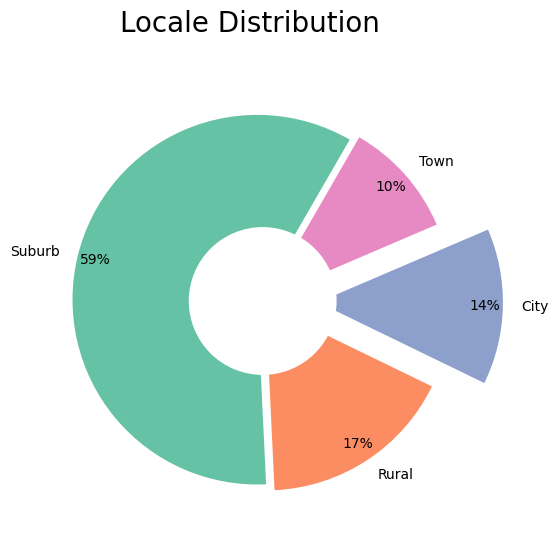

In [53]:
fig, ax  = plt.subplots(figsize=(10, 6),dpi=100)
fig.suptitle('Locale Distribution', size = 20, color = "black")
explode = ( 0.03, 0.03, 0.3, 0.03)
labels = list(districts_data.locale.value_counts().index)
sizes = districts_data["locale"].dropna().value_counts()
ax.pie(sizes,
       explode = explode,
       colors = sns.color_palette("Set2"),
       startangle = 60,
       labels = labels,
       autopct = '%1.0f%%',
       pctdistance = 0.9
      )
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

## Educational Product Providers
Google provide most educational products then any one close to it.
>In short online education is dominatied by Google LLC

In [54]:
alt.Chart(products_data.dropna()).transform_aggregate(
        count='count()',
        groupby=['Provider/Company Name']
    ).transform_window(
        rank='rank(count)',
        sort=[alt.SortField('count', order='descending')]
    ).transform_filter(
        alt.datum.rank < 10
    ).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3).encode(
        y=alt.Y('Provider/Company Name:N', sort='-x'),
        x='count:Q',
        tooltip='count:Q',
        color=alt.Color('Provider/Company Name:O',
                    sort=alt.EncodingSortField(field="Provider/Company Name",op="count", order='descending'),
                    legend=None,scale=alt.Scale(scheme = 'set2'))
    ).properties(title='Top Educational Product Providers')

alt.Chart(...)

Let'see what are the products provided by Google

In [17]:
products_data[products_data['Provider/Company Name']=='Google LLC']['Product Name'].value_counts().head(10).to_frame()

,count
Product Name,
Google Books,1
Google Chrome,1
CHROME MUSIC LAB,1
Meet,1
Google Groups,1
Interland,1
Chrome Web Store,1
Kiddle,1
Google Calendar,1


## Educational Sector Distributions
Educational sectors are divided into three categories, PreK-12, Higher Education, and Corporate.
>Some products are specific to a sector but others are quite general.  

In [19]:
# Assuming products_data is your DataFrame
sector = products_data["Sector(s)"].value_counts().to_frame().reset_index()

# Renaming the columns for clarity
sector.columns = ['Sector', 'Count']

# Apply the background gradient only to the numerical 'Count' column
sector.style.background_gradient(cmap="Set2", subset=['Count'])

,Sector,Count
0,PreK-12,170
1,PreK-12; Higher Ed; Corporate,115
2,PreK-12; Higher Ed,65
3,Corporate,1
4,Higher Ed; Corporate,1


As we can see PreK education is dominating the distribution with 54 percentage.

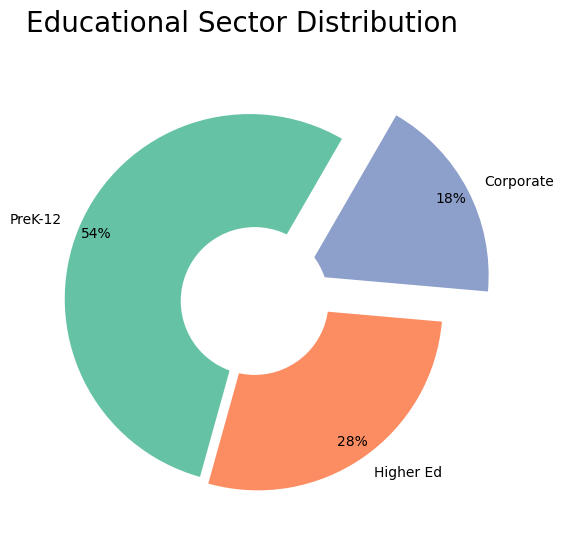

In [55]:
c1,c2,c3 = 0, 0, 0
for s in products_data["Sector(s)"]:
    if(not pd.isnull(s)):
        s = s.split(";")
        for i in range(len(s)):
            sub = s[i].strip()
            if(sub == 'PreK-12'): c1+=1
            if(sub == 'Higher Ed'): c2+=1
            if(sub == 'Corporate'): c3+=1

fig, ax  = plt.subplots(figsize=(10, 6),dpi=100)

fig.suptitle('Educational Sector Distribution', size = 20, color = "black")
explode = ( 0.03, 0.03, 0.3)
labels = ['PreK-12','Higher Ed','Corporate']
sizes = [c1,c2,c3]
ax.pie(sizes,
       explode = explode,
       colors = sns.color_palette("Set2"),
       startangle = 60,
       labels = labels,
       autopct = '%1.0f%%',
       pctdistance = 0.9
      )
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

## Primary Functions with main and subcategories
There are three types of main primary functions.
1. LC = Learning & Curriculum
2. CM = Classroom Management
3. SDO = School & District Operations.

We can interact with Plotly sunburst plot to explore the distribution of main categories and subcategories.

>The Learning products have majority shares in this group and the most common subcategories are digital learning platforms.

In [56]:
PEF_cat_main = []
PEF_cat_sub = []

for p in products_data["Primary Essential Function"]:
    if not pd.isnull(p):
        cat1 = p.split("-", 1)[0].strip()
        PEF_cat_main.append(cat1)
        cat2 = p.split("-", 1)[1].strip()
        PEF_cat_sub.append(cat2)
    else:
        PEF_cat_main.append(np.nan)
        PEF_cat_sub.append(np.nan)

products_data["Essential_Function_main"] = PEF_cat_main
products_data["Essential_Function_sub"] = PEF_cat_sub

DE = (
    products_data[["Essential_Function_main", "Essential_Function_sub"]]
    .value_counts()
    .rename_axis(["Essential_Function_main", "Essential_Function_sub"])
    .reset_index(name="counts")
)

# Sunburst plot with color mapping
fig = px.sunburst(
    DE,
    path=["Essential_Function_main", "Essential_Function_sub"],
    values="counts",
    color="Essential_Function_main",  # Color by the main category
    title="Sunburst of Primary Essential Functions",
    color_discrete_sequence=px.colors.qualitative.Set2,  # Optional: different color theme
)

fig.show()


## Essential Function Subcategories Distribution
We can observe all the subcategories distribution.

> Content creation and digital learning are leading in this market.

In [60]:
fig = px.histogram(
    DE,
    x = "counts",
    y = "Essential_Function_sub",

    title="Primary Essential Function Sub-Categories",
)
fig.update_traces(marker = dict(
            color='mediumpurple'
            )),
fig.show()

# Merging Three Datasets
I will be merging all three datasets on `LP ID` and `district id`. As we can see the combined dataset has 18 columns that will later help us with both geographical and time series plots.

In [24]:
engagement_data['time'] = pd.to_datetime(engagement_data['time'])
engagement_data["district_id"] = engagement_data["district_id"].astype(str).astype(int)

In [25]:
complete_data = products_data.merge(
                                   engagement_data,
                                   left_on='LP ID',
                                   right_on='lp_id'
                                   ).merge(
                                    districts_data,
                                    left_on='district_id',
                                    right_on='district_id'
                                    )  # merging 3 datasets triggers memory warning



In [26]:
complete_data.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Essential_Function_main,Essential_Function_sub,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-10,13117.0,0.09,1.73,1204,Utah,Suburb,0.1,0.1,7000
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-02-04,13117.0,0.09,0.86,1204,Utah,Suburb,0.1,0.1,7000
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-03-18,13117.0,0.08,1.69,1204,Utah,Suburb,0.1,0.1,7000
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-07-01,13117.0,0.00,NaN,1204,Utah,Suburb,0.1,0.1,7000
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-07-30,13117.0,0.08,2.50,1204,Utah,Suburb,0.1,0.1,7000


## Top Educational Products
Google products are dominating with Wikipedia and Netflix as an exception. Netflix provides kids with educational seise and tutorials.

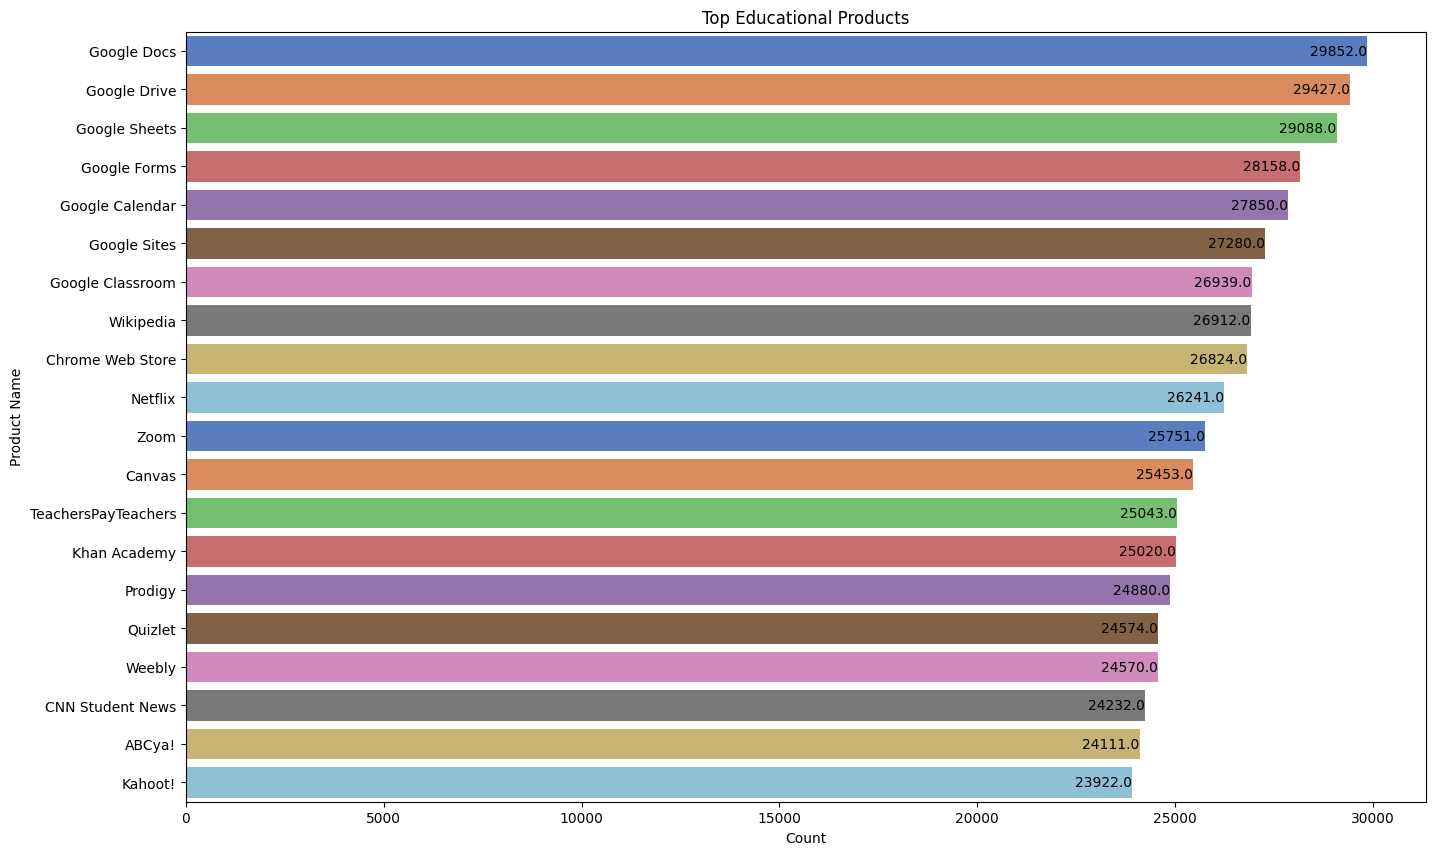

In [79]:
# Count occurrences of each product and get the top 20
product_counts = complete_data['Product Name'].value_counts().head(20).reset_index()
product_counts.columns = ['Product Name', 'Count']

# Plotting
plt.figure(figsize=(16, 10),dpi=100)
colors = sns.color_palette("muted", len(product_counts))  # Dynamic color palette

# Horizontal bar plot
ax = sns.barplot(y='Product Name', x='Count', data=product_counts, palette=colors, orient='h')

# Adding values inside the top-right corner of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    ax.annotate(f'{width}', 
                (width - 0.5, p.get_y() + height / 2),
                ha='right', va='center', color='black')

ax.set_xlabel('Count')
ax.set_title('Top Educational Products')

plt.show()

# Distribution of Race, Reduced Fee, Expenditures, and Internet connection per state
I will be used the Pandas function to display a table showing the mean distribution of various features related to demography and expenditures.

In [28]:
def mean_state_data(df,col):
    return df[[col,'state']].\
    groupby(by='state').\
    mean().\
    reset_index().\
    sort_values(by= col, ascending = False).\
    style.background_gradient(cmap="Set2_r", subset=[col])

## Black and Hispanic
I seems like Taxes have more Black/Hispanic students than another state followed by Florida, Michigan, and Minnesota.

In [29]:
mean_state_data(complete_data,'pct_black/hispanic')

,state,pct_black/hispanic
9,Texas,0.660262
0,Florida,0.500000
3,Michigan,0.500000
4,Minnesota,0.500000
8,North Carolina,0.399419
12,Washington,0.365211
1,Illinois,0.318224
2,Indiana,0.240701
10,Utah,0.137782
6,New Jersey,0.100000


## Reduced Fee or Free Education
Minnesota provides 70 percent of free or reduced fee education, followed by Michigan and Indiana.

In [30]:
mean_state_data(complete_data,'pct_free/reduced')

,state,pct_free/reduced
4,Minnesota,0.700000
3,Michigan,0.591493
2,Indiana,0.585556
12,Washington,0.514099
0,Florida,0.500000
9,Texas,0.500000
8,North Carolina,0.498838
11,Virginia,0.439539
7,New York,0.363762
5,Missouri,0.354510


## Per-pupil total expenditure
New York spend more on education than any other State in US. The runner-up States are New Jersey and Minnesota.

In [31]:
mean_state_data(complete_data,'pp_total_raw')

,state,pp_total_raw
7,New York,22303.680190
6,New Jersey,16025.174926
4,Minnesota,15000.000000
12,Washington,14007.350245
1,Illinois,13557.943471
3,Michigan,12085.066669
11,Virginia,11694.897092
13,Wisconsin,11000.000000
5,Missouri,9528.045970
8,North Carolina,9443.557370


# Time Series Distribution of Educational Product Access Students
I will be observing time-series distributions of Product Access Based on Locale and State.

## Based on Locale
The cities were hit with Covid19 the hardest which affected the students the most as they have to study from home that is why we can see the dip in product access from April to July 2020 as compared to other locales. During Summer vacation students stopped using educational products. In suburbs, students have more access to the tools then other locale. overall, they all follow a common pattern.

In [64]:
locale = (
    complete_data[["locale", "pct_access", "time"]]  
    .groupby(by=["time", "locale"])                  
    .mean()                                         
    .dropna()                                        
    .reset_index()                                   
)

fig = px.line(locale, x="time", y="pct_access", facet_col='locale',facet_col_wrap=1,color = 'locale')
fig.update_layout(
                      title=("Educational product Access per Locale").title(),
                     )
fig.show()

## Based on Top Five States
New York was hit hardest with Covid19 and that didn't affect the online learning of students as you can see graph became more consistent after the lockdown.
>New York, Wisconsin, and Indian have higher students using these educational products overall.

In [63]:
df = complete_data[["state","pct_access","time"]].groupby(by=["time","state"]).mean()
df.dropna(inplace =True)
df.reset_index(inplace = True)

top_5 = (
    df.groupby(by="state")                 
    .mean()                                
    .sort_values(by="pct_access", ascending=False)  
    .head(5)                               
    .reset_index()["state"]                
    .to_list()                             
)

top_states = df[df.state.isin(top_5)]
fig = px.line(top_states, x="time", y="pct_access", facet_col='state',facet_col_wrap=1,color = 'state')
fig.update_layout(
                      title=("Educational product Access on Top 5 States").title(),
                     )
fig.show()

## Based on Bottom Five States
This is odd as Michigan and North Carolina have almost zero product access from March till the end of August. The Texas have a similar pattern but they had a peak in June. Overall these bottom states became active after September 2020.

> It is strange that some states have a very odd pattern, maybe due to a bad educational system or lack of awareness.

In [62]:
bottom_5 = (
    df.groupby(by="state")            
    .mean()                              
    .sort_values(by="pct_access", ascending=False)  
    .tail(5)                               
    .reset_index()["state"]              
    .to_list()                            
)

top_states = df[df.state.isin(bottom_5)]
fig = px.line(top_states, x="time", y="pct_access", facet_col='state',facet_col_wrap=1,color = 'state')
fig.update_layout(
                      title=("Educational product Access on Bottom 5 States").title(),
                     )
fig.show()

# Geographical Analysis
In this section I will be looking at different states based on product access and engagement index.
>We do not have access to all states data so you might see a lot of gray space on the map.

In [61]:
geo_pct = (
    complete_data[["state", "pct_access"]]
    .groupby(by=["state"])
    .mean()
    .dropna()
    .reset_index()
)
geo = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

geo_pct = pd.merge(geo_pct,geo,on = 'state', how = 'left')[['state','pct_access','code']]
geo_pct.head()

,state,pct_access,code
0,Florida,0.469698,FL
1,Illinois,1.015525,IL
2,Indiana,1.137195,IN
3,Michigan,0.455343,MI
4,Minnesota,0.712585,MN


## Education Products Access per State
New York has a higher product access score than any other state, then comes Orange States Wisconson, Illinois, and Indiana. There might be a link between the lower population of Black/Hispanics in these states. Let's explore that in the next part.

In [36]:
fig = go.Figure(data=go.Choropleth(
    locations=geo_pct['code'], # Spatial coordinates
    z = geo_pct['pct_access'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'plasma',
    text = geo_pct['state'],
    colorbar_title = "product access",
))

fig.update_layout(
    title_text = 'Education Products access per state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

There is a relation between states with lower the population of Black/Hispanic but it is not the stronger. I can see Newyork and Wisconsin with a lower Black/Hispanic population and higher access rate but when it comes to other states with a lower percentage of people of color it's all over the place. The system is fairly balanced towards other races.

In [37]:
Top_state = ['New York','Wisconson', 'Illinois','Indiana']
Race_state = complete_data[['state','pct_access','pct_black/hispanic']]\
.groupby('state')\
.mean()\
.dropna()\
.reset_index()\
.sort_values(by=['pct_black/hispanic','pct_access'])
Race_state

,state,pct_access,pct_black/hispanic
5,Missouri,0.608459,0.100000
11,Virginia,0.672463,0.100000
13,Wisconsin,1.117182,0.100000
7,New York,1.386808,0.100000
6,New Jersey,0.731896,0.100000
10,Utah,0.687761,0.137782
2,Indiana,1.137195,0.240701
1,Illinois,1.015525,0.318224
12,Washington,0.531845,0.365211
8,North Carolina,0.361143,0.399419


## Engagement Index Per State
The Engagement distribution per state is quite similar to product access. It's logical that if students have access to these products there is a chance of an increase in usage of these platforms.

In [38]:
geo_engag = complete_data[["state","engagement_index"]]\
.groupby(by=["state"])\
.mean()\
.dropna()\
.reset_index()
geo_engag = pd.merge(geo_engag,geo,on = 'state', how = 'left')[['state','engagement_index','code']]
geo_engag.head()

,state,engagement_index,code
0,Florida,128.211853,FL
1,Illinois,317.793596,IL
2,Indiana,316.999175,IN
3,Michigan,146.528442,MI
4,Minnesota,197.637992,MN


In [39]:
fig = go.Figure(data=go.Choropleth(
    locations=geo_engag['code'], # Spatial coordinates
    z = geo_engag['engagement_index'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'plasma',
    text = geo_engag['state'],
    colorbar_title = "Engagement Index",
))

fig.update_layout(
    title_text = 'Education Products Engagement Index per state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

# Focusing on People from Improvised Neighborhood
In this section, I will be focusing on the Black/Hispanic community and free or reduced fees.

## Correlation
There is a high correlation between product access and engagement index, which means if the student has access to these products they might use them on daily basis. We can also see another high correlation between Black/Hispanic and Free/ Reduced education. This means the government is doing its job in helping improvised communities to get a proper education.

<Axes: >

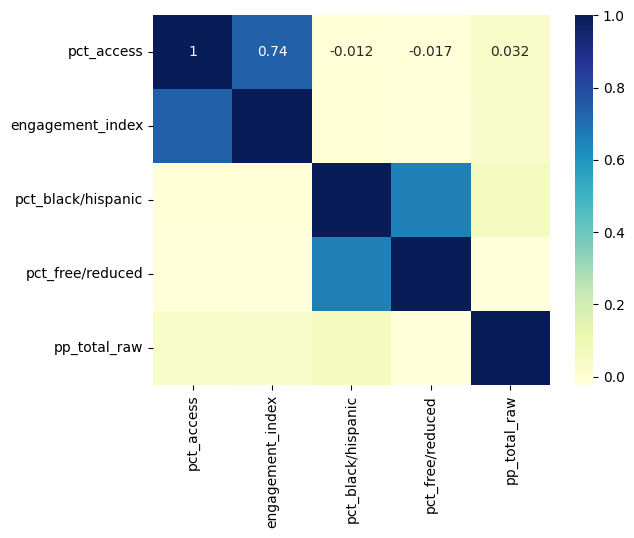

In [46]:
# Drop non-relevant columns
numeric_data = complete_data.drop(['LP ID','lp_id','district_id'], axis=1)

# Select only numeric columns
numeric_data = numeric_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)

## Black/Hispanic products access over the year.
The graph below shows that over time the communities with a lesser population of Blacks and Hispanics have a similar pattern to some of the Top states we have discussed earlier. Let's compare this graph with the mixed communities.

In [43]:
Imp_neigh= complete_data[complete_data['pct_black/hispanic']<0.2][['time','pct_access','pct_black/hispanic']].groupby('time').mean().reset_index()
fig = px.line(Imp_neigh, x="time", y="pct_access")
fig.update_layout(
                      title=("Black/Hispanic community access to Online Education").title(),
                     )
fig.show()

We can see some changes as the peak has fallen from 1.4 to 1.2. It is a disparity among the different racial groups but its marginal compares to other countries. We can say Black/Hispanic communities have lesser access to educational products.

In [44]:
Imp_neigh= complete_data[complete_data['pct_black/hispanic']>=0.2][['time','pct_access','pct_black/hispanic']].groupby('time').mean().reset_index()
fig = px.line(Imp_neigh, x="time", y="pct_access")
fig.update_layout(
                      title=("Black/Hispanic community access to Online Education").title(),
                     )
fig.show()

# Conclusion
The data is limited to fewer states and I didn't found any concrete evidence that Black or Hispanic communities get unfair treatment. Online education is fairly balanced towards all. I did see how some of the states perform worst in terms of product access rating, this might be due to bad policymaking and lack of awareness. We can see that Google is dominating the online education industry by providing a complete ecosystem. The majority of Pre-K students are using these platforms for digital learning. Suburbs have the highest students accessing these products and we can see a clear correlation between product access and engagement index. There is also a high correlation between Black/Hispanic and Free education/ Reduced Fee, which means the government is doing its best to help the poor community by providing free education.